# Thefts and larcenies consitute the large majority of the infractions in San Fransisco, they occur primarliy during the week-end and tend to increase during the summer school holidays. 

I used the dataset related to San Fransisco incidents 
during summer 2014. I want to understand the prevalence of the different types of infractions and potential seasonnal effects. 

In [19]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# get the data
SFdat=pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

## Type of infractions reported in San Fransisco

### Design of Fig. 1

The number of occurence for each type of infractions is presented in fig. 1. I had to map each type of infractions to an integer identifier such as to be able to plot the data. After that, I had to associate the thicks on the x-axis to the corresponding infraction's name. 

In [20]:
# map each type of infractions to an integer 
SF_cat2int=np.unique(SFdat.Category.values,return_inverse=True)

In [21]:
import collections

In [22]:
# count the number of infraction for each category
counter_SF=collections.Counter(SF_cat2int[1])


In [23]:
bugType_SF=counter_SF.keys()
bugNb_SF=counter_SF.values()

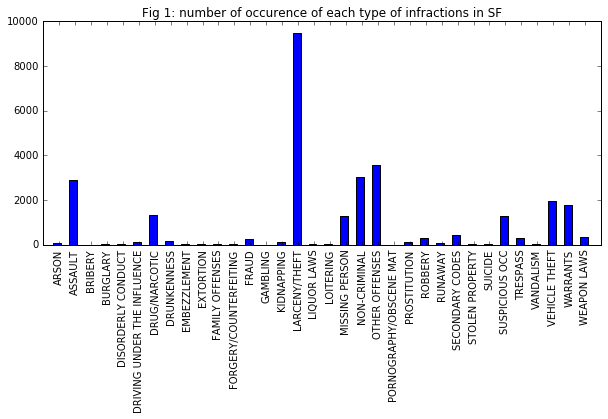

In [24]:
# shift a bit the xdata so that the bar are centered around the label
plt.bar(np.array(bugType_SF)-0.35,bugNb_SF,width=0.5)
plt.xticks(bugType_SF,SF_cat2int[0],rotation=90)
fig=plt.gcf()
sizeFig=fig.get_size_inches()
# increase width of the figure
fig.set_size_inches(10,4)
plt.xlim([-1,34])
plt.title('Fig 1: number of occurence of each type of infractions in SF')
plt.show()

### Interpretation

Fig 1 shows that there is significantly more drug infractions that drunkness cases. This might be a sign that people in SF prefer to get high rather than getting drunk. More seriously, this is more likely related to the fact that police officers are more severe with respect to drug users than drunk people. 
In SF, the vast majority of infractions are larcenies of thefts. In the following, I will pay a special attention on this group of infractions and check if it depends on the day of the week.  

## Variation of the frequency of the infractions with the day of the week

### Design of Fig. 2

Fig. 2 shows the frequency of infractions for the different days of the week. The frequency is defined as the number of infractions occuring on the ith day over the total number of infractions.
Prior to plot, the results I had to map the different days of the week to an integer identifier. By default, ipython sorts the element of the list containing the days of the week in the alphabetical order (i.e ['Friday','Monday','Saturday',etc...]). This order is not convenient for plotting the results. I therefore choose to permute the index of each day so that I obtain the frequency of buglaries sorted in chronological order. 

In [25]:
# query the data corresponding to larceny/theft
SF_theft=SFdat[SFdat.Category == "LARCENY/THEFT"]



In [26]:
# map the day of the week to an integer
allBug_day2int=np.unique(SFdat.DayOfWeek.values,return_inverse=True)
larceny_day2int=np.unique(SF_theft.DayOfWeek.values,return_inverse=True)

In [27]:
# count the number of occurence for each day of the week
count_day_allBug=collections.Counter(allBug_day2int[1])
count_day_larceny=collections.Counter(larceny_day2int[1])

In [28]:
# turn the number of occurence to a float so as to compute the frequency
day_allBug_int=count_day_allBug.keys()
day_allBug_nb=map(float,count_day_allBug.values())
frac_allBug=np.array(day_allBug_nb)/sum(day_allBug_nb)

In [29]:
day_larceny_int=count_day_larceny.keys()
day_larceny_nb=map(float,count_day_larceny.values())
frac_larceny=np.array(day_larceny_nb)/sum(day_larceny_nb)

In [30]:
# show the relation between days of the week and integer identifier
print allBug_day2int[0]
print np.unique(allBug_day2int[1])    

['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
[0 1 2 3 4 5 6]


In [31]:
# permute the order of the data such as to have Monday in first position, tuesday in second position etc...
frac_allBug_sort=[frac_allBug[i] for i in [1, 5 ,6 ,4 ,0, 2, 3]]
frac_larceny_sort=[frac_larceny[i] for i in [1, 5 ,6 ,4 ,0, 2, 3]]

In [32]:
sortDayInt=range(7)
labelDay=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']

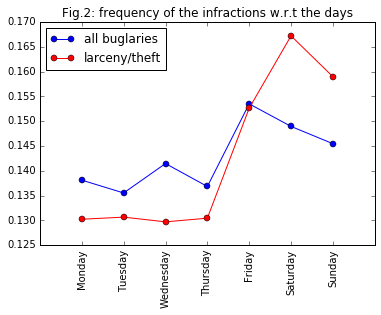

In [33]:
# plot the data
plt.plot(sortDayInt,frac_allBug_sort,'o-',label='all buglaries')
plt.xlim([-1, 7])
plt.hold
plt.plot(sortDayInt,frac_larceny_sort,'o-r',label='larceny/theft')
plt.xticks(sortDayInt,labelDay,rotation=90)
plt.title('Fig.2: frequency of the infractions w.r.t the days')
plt.legend(loc=2)






### Interpretation

Considering first all infractions irrespective of their category, we see a slight increase of the infractions frequency about 1-2% during the week-end. This increase is much more pronounced for the larcenies and the thefts as the corresponding frequency clearly increases on Friday and reaches a peak on Saturday. People are more likely to be away from home during the weekend which may explain why the thieves prefer to organize their attack during this specific period. 

## Variation of the number of larcenies/thefts during the summer period

In [34]:
dateUn=np.unique(SF_theft.Date.values,return_counts=True)
meanJune=np.mean(dateUn[1][0:29])
meanJuly=np.mean(dateUn[1][30:61])
meanAug=np.mean(dateUn[1][62:])




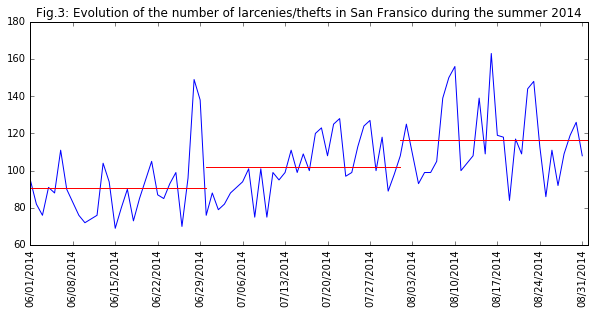

In [35]:
plt.plot(dateUn[1])
myXlab=dateUn[0][np.arange(0,92,7)]
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.xticks(np.arange(0,92,7),myXlab,rotation=90)
plt.hold
plt.plot([0,29],[meanJune , meanJune],'r')
plt.plot([29,61],[meanJuly , meanJuly],'r')
plt.plot([61, 92],[meanAug , meanAug],'r')
plt.title('Fig.3: Evolution of the number of larcenies/thefts in San Fransico during the summer 2014')

### Interpretation

The blue curve of Fig. 3 shows the evolution of the number of larcenies/thefts in SF over the summer 2014. In June, the number of thefts is rather stable except a very strong peak during the last weekend. Without surprises, we observe a clear increase of the number of larcenies during the first half of July, which corresponds to the start of the summer holidays. The overall increase of the thefts during the summer is best seen on the red curve which shows the monthly averaged number of thefts. 